#**Individual Hypertension Risk Prediction**

#**Import Library**



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Memuat Dataset**

In [3]:
file = "/content/drive/MyDrive/CheckPoint AVD/hypertension_dataset.csv"

df = pd.read_csv(file)

df

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No
...,...,...,...,...,...,...,...,...,...,...,...
1980,56,10.2,0,Normal,6.5,25.0,Diuretic,Yes,Low,Non-Smoker,Yes
1981,29,8.9,4,Hypertension,6.9,16.9,NaN,Yes,High,Non-Smoker,Yes
1982,64,5.9,9,Normal,5.6,18.9,ACE Inhibitor,Yes,Moderate,Non-Smoker,Yes
1983,35,7.4,8,Prehypertension,8.2,29.2,NaN,Yes,Moderate,Non-Smoker,No


#**Bussiness Understanding**

##**Bussiness Objective**

Dataset *Hypertension Risk Prediction* merupakan dataset kesehatan yang digunakan untuk menganalisis dan memprediksi risiko hipertensi pada individu berdasarkan berbagai faktor yang mempengaruhinya. Dataset ini diperoleh dari Kaggle yang merupakan platform penyedia dataset.

Tujuan utama dari analisis ini adalah untuk membantu tenaga kesehatan, instansi kesehatan, maupun program kesehatan masyarakat dalam mengidentifikasi individu yang memiliki risiko hipertensi sejak dini. Dengan adanya sistem prediksi berbasis data, proses *screening* kesehatan dapat dilakukan secara lebih cepat dan efisien dibandingkan metode konvensional.

Selain itu, analisis ini bertujuan untuk mendukung program pencegahan penyakit dengan memberikan informasi mengenai faktor-faktor yang berpengaruh terhadap risiko hipertensi. Dalam jangka panjang, hasil analisis ini diharapkan dapat mengurangi angka penderita hipertensi.



##**Asses Situation**

Dalam dataset yang digunakan sudah mencakup beberapa faktor penting seperti usia, jenis kelamin, kebiasaan merokok, aktivitas fisik, serta indikator kesehatan lainnya. Hal ini menunjukkan bahwa dataset memiliki potensi yang baik untuk digunakan dalam proses analisis dan pembuatan model prediksi.

Namun, terdapat beberapa tantangan yang mungkin muncul, seperti adanya data kosong atau *missing value*. Selain itu, karena data berkaitan dengan kesehatan, hasil analisis harus diartikan secara hati-hati agar tidak menimbulkan kesalahan pengambilan keputusan medis.

##**Analytic Goals & Project Plan**


Tujuan analitik dari analisis dataset *Hypertension Risk Prediction* dapat dicapai dengan melakukan beberapa tahapan analisis dan pengolahan data sebagai berikut:
1. Menganalisa hubungan antara faktor kesehatan dengan gaya hidup pada risiko hipertensi.
2. Mengidentifikasi risiko hipertensi untuk pencegahan di kalangan umum.
3. Melakukan perbandingan kondisi kesehatan antara individu yang mengalami hipertensi dan tidak mengalami hipertensi.
4. Menghasilkan informasi yang dapat digunakan sebagai dasar edukasi kesehatan dan peningkatan kesadaran terhadap hipertensi.
5. Mendukung pengambilan keputusan dalam program pencegahan dan promosi kesehatan berbasis data.

#**Data Understanding**

##**Struktur Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


Berdasarkan data diatas dapat disimpulkan bahwa dataset ini memiliki 1985 baris dan 11 kolom, yang terdiri dari:

1. Age: Jumlah baris 1985, tipe data int64, deskripsi: Umur
2. Salt_Intake: Jumlah baris 1985, tipe data float64, deskripsi: asupan garam yang dikonsumsi.
3. Stress_Score: Jumlah baris 1985, tipe data int64, deskripsi: Skor atau nilai stress.
4. Bp_History: Jumlah baris 1985, tipe data object, deskripsi: Kondisi tekanan darah.
5. Sleep_Duration: Jumlah baris 1985, tipe data float64, deskripsi: Durasi tidur.
6. BMI: Jumlah baris 1985, tipe data float64, deskripsi: Indeks masa tubuh untuk menentukan kategori berat badan seorang.
7. Medication: Jumlah baris 1985, tipe data object, deskripsi: jenis obat yang dikonsumsi kepada pasien.
8. Family_History: Jumlah baris 1985, tipe data object, deskripsi: Riwayat penyakit dari keluarga.
9.  Exercise_Level: Jumlah baris 1985, tipe data object, deskripsi: level aktivitas fisik.
10. Smoking_Status: Jumlah baris 1985, tipe data object, deskripsi: kebiasaan merokok
11. Has_Hypertension: Jumlah baris 1985, tipe data object, deskripsi: status apakah mengalami hipertensi atau tidak.

##**Statistik Deskriptif**

In [5]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


1. Count (Kelengkapan Data)

Berdasarkan data, total observasi adalah **1985 baris**. Maka dapat disimpulkan:

* Age = 1985 (tidak ada missing value)
* Salt_Intake = 1985 (tidak ada missing value)
* Stress_Score = 1985 (tidak ada missing value)
* Sleep_Duration = 1985 (tidak ada missing value)
* BMI = 1985 (tidak ada missing value)

Kesimpulan:Seluruh kolom numerik lengkap (tidak terdapat missing values). Dataset sudah bersih dari sisi kelengkapan data.
2. Mean vs Median (Distribusi Data)

Kolom Age
* Mean = 50,34
* Median = 50,00

Nilai mean dan median hampir sama, distribusi usia relatif simetris dan tidak banyak outlier ekstrem.

Kolom Salt_Intake
* Mean = 8,53
* Median = 8,50

Perbedaan sangat kecil distribusi konsumsi garam cenderung normal/simetris
Kolom Stress_Score
* Mean = 4,98
* Median = 5,00

Mean sedikit lebih kecil dari median distribusi relatif simetris, tidak menunjukkan skewness yang signifikan.

Kolom Sleep_Duration
* Mean = 6,45
* Median = 6,50

Mean sedikit lebih kecil dari median distribusi sedikit left-skewed ringan, namun masih tergolong stabil.

Kolom BMI
* Mean = 26,02
* Median = 25,90

Mean sedikit lebih besar dari median → terdapat kemungkinan beberapa nilai BMI tinggi yang menarik rata-rata ke atas, namun tidak ekstrem.

Kesimpulan Distribusi:
Secara keseluruhan, variabel dalam dataset ini cenderung berdistribusi cukup simetris (mendekati normal) dan tidak menunjukkan skewness yang ekstrem.

3. Min dan Max (Validasi Logika Data)
Age
* Min = 18
* Max = 84

Rentang usia logis untuk populasi dewasa.

Salt_Intake
* Min = 2,5
* Max = 16,4

Rentang konsumsi garam cukup lebar → perlu diperhatikan apakah 16,4 termasuk konsumsi sangat tinggi (berisiko hipertensi).

Stress_Score

* Min = 0
* Max = 10

Skala terlihat seperti skala penilaian (0–10), sehingga valid secara logika.

Sleep_Duration
* Min = 1,5 jam
* Max = 11,4 jam
Durasi tidur minimum 1,5 jam tergolong sangat rendah dan bisa menjadi indikator gangguan tidur atau outlier ringan.

BMI

* Min = 11,9
* Max = 41,9

BMI minimum 11,9 sangat rendah (underweight ekstrem).
BMI maksimum 41,9 menunjukkan kategori obesitas berat.

Kesimpulan:

* Rentang data cukup luas terutama pada BMI dan Salt_Intake.
* Nilai ekstrem (BMI sangat rendah & tinggi, Sleep sangat rendah) perlu dicek apakah valid secara medis atau outlier.

 4. Standar Deviasi (std) – Variabilitas Data
Age
* Mean = 50,34
* Std = 19,44

Variasi usia cukup besar → dataset mencakup rentang generasi yang luas.

Salt_Intake
* Mean = 8,53
* Std = 1,99

Variasi konsumsi garam relatif moderat (sekitar 23% dari mean).

Stress_Score

* Mean = 4,98
* Std = 3,14

Standar deviasi cukup besar dibandingkan mean → tingkat stres antar individu cukup bervariasi.

Sleep_Duration

* Mean = 6,45
* Std = 1,54

Variasi durasi tidur tergolong moderat dan masih dalam batas wajar populasi umum.

BMI
* Mean = 26,02
* Std = 4,51

Standar deviasi sekitar 17% dari mean → variasi BMI cukup signifikan, menunjukkan adanya kelompok underweight hingga obesitas.

Kesimpulan Umum

1. Dataset lengkap tanpa missing values.
2. Sebagian besar variabel berdistribusi cukup simetris.
3. Terdapat beberapa nilai ekstrem pada BMI dan Sleep_Duration yang perlu eksplorasi lebih lanjut.
4. Variabilitas terbesar terlihat pada Age dan Stress_Score, menunjukkan populasi yang heterogen.


## **VERIFIKASI KUALITAS DATA**

###**Data Type Check**

In [ ]:
df.dtypes

,0
Age,int64
Salt_Intake,float64
Stress_Score,int64
BP_History,object
Sleep_Duration,float64
BMI,float64
Medication,object
Family_History,object
Exercise_Level,object
Smoking_Status,object


Terlihat dari data df.types diatas terlihat antara kolom dan tipe data sudah sesuai dan tidak ada yang tidak sesuai.

###**Inconsistent Values**

Pada tahap ini, perlu dilakukan pengecekan konsistensi data, khususnya pada penulisan nilai dalam setiap kolom. Proses ini bertujuan untuk memastikan bahwa data yang secara makna sama tidak tercatat sebagai kategori yang berbeda hanya karena perbedaan format atau penulisan.

1. **Age**

In [ ]:
df['Age'].unique()

array([69, 32, 78, 38, 41, 20, 39, 70, 19, 47, 55, 81, 77, 50, 75, 66, 76,
       59, 79, 64, 68, 72, 24, 56, 35, 21, 31, 26, 61, 25, 52, 53, 67, 23,
       71, 80, 51, 65, 57, 43, 58, 46, 62, 82, 18, 28, 22, 45, 29, 40, 54,
       44, 60, 30, 49, 83, 74, 73, 36, 34, 33, 37, 84, 48, 42, 63, 27])

Terlihat dari data 'Age' di atas bahwa seluruh nilai usia berada pada rentang 18–84 tahun dan semuanya berbentuk angka (integer). Tidak ditemukan nilai negatif atau teks yang tidak sesuai.

Kesimpulan: Data usia sudah konsisten dan tidak terdapat inkonsistensi.

2. **Salt_Intake**

In [ ]:
df['Salt_Intake'].unique()

array([ 8. , 11.7,  9.5, 10. ,  9.8, 10.8,  8.9,  5.9,  9.3,  7.2,  7.4,
        9.7, 11. ,  8.5,  9.1, 11.9,  9. , 13.7,  9.6,  5. , 11.1,  8.2,
        6.1,  8.1,  6.8,  7.3, 11.8,  9.4, 10.9,  6.9,  8.3,  6.7,  7.6,
        9.9,  7.8, 12. ,  7.7, 10.4,  5.7,  5.4, 13.6, 11.6, 12.5, 12.6,
       10.5, 10.1,  8.7, 11.5,  6.2,  7.1,  4.8,  6.5, 12.2,  6.6, 10.7,
       12.3,  7.5,  6.3,  8.8,  5.3,  2.8,  8.4,  9.2, 10.3,  7. ,  3.7,
        7.9,  8.6,  6. ,  5.8,  6.4,  2.7,  3.8, 11.2, 14.9,  5.6, 10.2,
       10.6, 11.3,  4.3, 12.4,  4.2,  3.1, 12.8,  5.5,  4.7,  4.9, 12.1,
        5.2,  5.1, 13. ,  4.5,  3.4, 13.8, 14.8,  2.6,  2.5, 14. ,  3.6,
        3.9, 11.4, 13.3, 12.7,  4.1,  4.6,  3.3, 14.7, 13.2, 14.4, 14.5,
       13.4,  3.2,  4. , 13.9, 12.9,  3. , 16.4,  3.5,  4.4, 13.1, 14.2])

Terlihat bahwa seluruh nilai konsumsi garam berada pada rentang 2.5–16.4 dan berbentuk angka desimal (float). Tidak ditemukan nilai dalam bentuk teks atau format yang berbeda.

Kesimpulan: Data konsumsi garam sudah konsisten dan tidak terdapat inkonsistensi.

3. **Stress_Score**

In [ ]:
df['Stress_Score'].unique()

array([ 9, 10,  3,  1,  0,  7,  5,  8,  6,  4,  2])

Nilai stress score berada pada skala 0–10 dan seluruhnya berbentuk angka (integer). Tidak ada nilai di luar rentang skala maupun format yang berbeda.

Kesimpulan: Data stress score konsisten dan tidak ditemukan inkonsistensi.

4. **BP_History**

In [ ]:
df['BP_History'].unique()

array(['Normal', 'Hypertension', 'Prehypertension'], dtype=object)

Nilai yang muncul hanya terdiri dari 'Normal', 'Hypertension', dan 'Prehypertension' dengan penulisan yang seragam. Tidak ditemukan perbedaan huruf besar-kecil atau typo.

Kesimpulan: Data BP_History konsisten dan tidak mengandung inconsistent value.

5. **Sleep_Duration**

In [ ]:
df['Sleep_Duration'].unique()

array([ 6.4,  5.4,  7.1,  4.2,  5.8,  5.2,  7.8,  7.2,  4.7,  6.2,  5.3,
        7.9,  8.4,  4.3,  7.7,  6.1,  6.5,  9.2,  5. ,  4.6,  2.3,  8.2,
        3.3,  6.3,  8.5,  9.8,  6. ,  4.4,  5.6,  7. ,  5.7,  7.5,  5.9,
        4. ,  6.7,  3.6,  4.5,  3.8,  9.1,  7.6,  9.9,  5.1,  8.8,  6.8,
        8.1,  4.9,  8. ,  3.7,  4.1,  6.6,  9.6,  7.4,  8.9,  9.7,  7.3,
        8.6,  2.2,  3.9,  2.9,  4.8,  3.2,  6.9,  5.5, 10.1,  8.3,  9.4,
        3.5,  8.7,  3. ,  3.4, 10.8, 10.3,  1.6,  9. ,  2. ,  2.5,  9.3,
       10.2, 11. ,  1.5,  2.4,  9.5, 10.6,  2.8,  3.1, 11.4,  1.7, 10. ])

Durasi tidur berada pada rentang 1.5–11.4 jam dan seluruhnya berbentuk angka desimal (float). Tidak ditemukan format teks atau simbol yang tidak sesuai.

Kesimpulan: Format data konsisten dan tidak terdapat inkonsisten.

6. **BMI**

In [ ]:
df['BMI'].unique()

array([25.8, 23.4, 18.7, 22.1, 16.2, 21.9, 27.6, 36.5, 24.3, 24. , 30.8,
       17.3, 19.3, 29. , 25.1, 25.2, 21.8, 27.1, 22.4, 26.3, 20.8, 35.1,
       24.1, 25.4, 26.8, 28.1, 27.2, 27.3, 26.5, 25. , 17.8, 37.8, 29.3,
       21.6, 27. , 19.9, 23.8, 18.9, 27.7, 29.1, 22.3, 26.7, 22. , 28.3,
       22.9, 29.6, 21.5, 21. , 26.9, 28.5, 23.7, 13.4, 26.2, 29.5, 38.1,
       23. , 27.4, 24.8, 31.7, 24.9, 29.9, 31.2, 18.5, 31.8, 26. , 30.1,
       26.4, 20. , 25.9, 32.1, 28.9, 21.4, 24.6, 35.4, 28.7, 23.1, 33.6,
       35.9, 20.2, 22.6, 23.9, 22.8, 33.8, 32.4, 27.8, 25.3, 28.4, 30. ,
       22.5, 20.1, 35.8, 30.9, 25.7, 19.8, 12. , 31.9, 21.3, 28.6, 27.9,
       32.9, 35. , 18.6, 29.2, 41.3, 28. , 26.1, 21.1, 17.5, 31.3, 23.5,
       37.7, 27.5, 18.1, 30.7, 29.4, 20.9, 20.3, 30.6, 23.2, 19.2, 16.1,
       34.3, 23.3, 24.4, 17.4, 28.8, 36.7, 25.5, 33.5, 32.6, 26.6, 17.7,
       21.7, 32.5, 24.2, 20.7, 17.6, 32.8, 33.9, 31.5, 24.5, 32.3, 37.4,
       23.6, 34.2, 19.7, 18.8, 21.2, 29.7, 30.5, 19

Terlihat dari data di atas bahwa nilai BMI berada pada rentang 11.9–41.9 dan seluruhnya berbentuk angka desimal (float). Tidak ditemukan nilai dalam bentuk teks atau format yang berbeda.

Kesimpulan: Secara format data sudah konsisten dan tidak terdapat inkonsistensi.

7. **Medication**

In [ ]:
df['Medication'].unique()

array([nan, 'ACE Inhibitor', 'Other', 'Beta Blocker', 'Diuretic'],
      dtype=object)

Nilai yang muncul terdiri dari 'ACE Inhibitor', 'Beta Blocker', 'Diuretic', 'Other', serta terdapat nilai NaN. Penulisan kategori terlihat konsisten tanpa typo atau perbedaan huruf besar kecil.

Kesimpulan: Tidak terdapat inkonsistensi penulisan, namun terdapat missing value (NaN).

8. **Family_History**

In [ ]:
df['Family_History'].unique()

array(['Yes', 'No'], dtype=object)

Nilai yang muncul hanya 'Yes' dan 'No' dengan penulisan yang seragam. Tidak ditemukan variasi seperti "yes" atau "YES".

Kesimpulan: Data konsisten dan tidak mengandung inconsistent value.

9. **Exercise_Level**

In [ ]:
df['Exercise_Level'].unique()

array(['Low', 'Moderate', 'High'], dtype=object)

Nilai yang muncul terdiri dari 'Low', 'Moderate', dan 'High' dengan format penulisan yang konsisten. Tidak terdapat variasi penulisan atau kategori tambahan.

Kesimpulan: Data sudah konsisten dan tidak ditemukan inkonsistensi.

10. **Smoking_Status**

In [ ]:
df['Smoking_Status'].unique()

array(['Non-Smoker', 'Smoker'], dtype=object)

Nilai yang muncul hanya 'Non-Smoker' dan 'Smoker' dengan penulisan yang seragam. Tidak ditemukan variasi format atau typo.

Kesimpulan: Data konsisten dan tidak terdapat inconsistent value.

11. **Has_Hypertention**

In [ ]:
df['Has_Hypertension'].unique()

array(['Yes', 'No'], dtype=object)

Terlihat dari data di atas bahwa nilai yang muncul hanya 'Yes' dan 'No' dengan penulisan yang seragam. Tidak ditemukan variasi seperti “yes”, “YES”, atau nilai kosong.

Kesimpulan: Data pada kolom Has_Hypertension sudah konsisten dan tidak terdapat inconsistent value.

###**Missing Values**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Age,0.000000
Salt_Intake,0.000000
Stress_Score,0.000000
BP_History,0.000000
Sleep_Duration,0.000000
BMI,0.000000
Medication,40.251889
Family_History,0.000000
Exercise_Level,0.000000
Smoking_Status,0.000000


Terlihat dari data diatas, kesimoulannya adalah:

1. Age Null 0%
Tidak terdapat missing value, data lengkap dan siap digunakan.

2. Salt_Intake Null 0%
Tidak terdapat missing value.

3. Stress_Score Null 0%
Data lengkap tanpa nilai kosong.

4. BP_History Null 0%
Tidak ditemukan missing value.

5. Sleep_Duration Null 0%
Data lengkap dan konsisten.

6. BMI Null 0%
Tidak terdapat missing value.

7. Medication Null 40.25%
Terdapat missing value dalam jumlah cukup besar, perlu penanganan khusus pada tahap preprocessing.

8. Family_History Null 0%
Data lengkap tanpa nilai kosong.

9. Exercise_Level Null 0%
Tidak terdapat missing value.

10. Smoking_Status Null 0%
Data lengkap dan konsisten.

11. Has_Hypertension Null 0%
Tidak terdapat missing value dan siap digunakan sebagai variabel target.

Kesimpulan:
Hanya kolom Medication yang memiliki missing value, sementara kolom lainnya sudah lengkap.

###**Duplicated Values**

In [ ]:
df[df.duplicated()]

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension


Terlihat dari data diatas, pada dataset ini tidak memiliki Duplicate Value atau nilai yang terduplikat.

###**Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,0.000000
Salt_Intake,0.856423
Stress_Score,0.000000
Sleep_Duration,0.604534
BMI,0.806045


Dari data diatas dapat disimpulkan, bahwa:
1. Tidak ada outlier pada variabel Age dan Stress_Score, yang menunjukkan bahwa distribusi usia dan tingkat stres dalam dataset relatif stabil dan konsisten tanpa adanya nilai ekstrem.  
2. Sekitar 0,86% data pada variabel Salt_Intake teridentifikasi sebagai outlier, yang menunjukkan adanya individu dengan konsumsi garam yang sangat rendah atau tinggi dibandingkan dengan responden lainnya, sehingga pola makan ekstrem dapat terdeteksi dalam dataset.  
3. Variabel Sleep_Duration menunjukkan sekitar 0,60% sebagai outlier, yang menunjukkan adanya responden dengan durasi tidur yang sangat pendek atau sangat lama, yang dapat mencerminkan gangguan tidur atau kondisi kesehatan tertentu.  
4. Variabel BMI memiliki sekitar 0,81% outlier, yang mencerminkan adanya individu dengan indeks massa tubuh yang sangat rendah atau tinggi, sehingga menunjukkan variasi ekstrem dalam kondisi berat badan dalam populasi data.

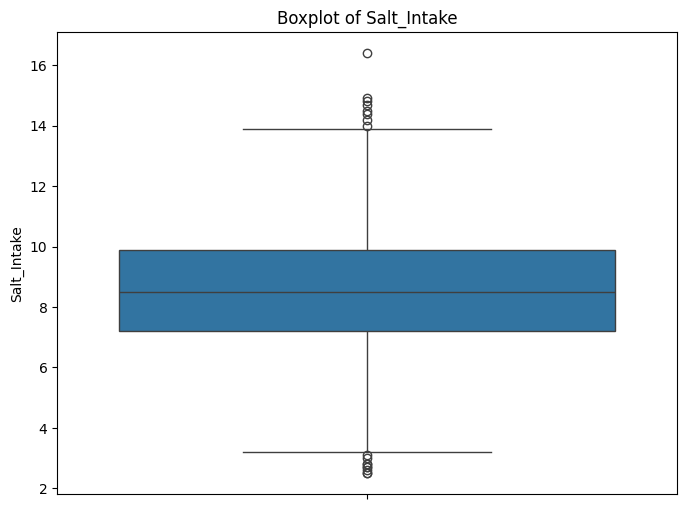

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Salt_Intake'])
plt.title('Boxplot of Salt_Intake')
plt.ylabel('Salt_Intake')
plt.show()

Dari gambar diatas, dapat disimpulkan bahwa:
1. Distribusi nilai Salt_Intake terfokus pada median yang berada pada rentang sedang, menunjukkan bahwa banyak responden memiliki tingkat konsumsi garam yang cenderung moderat.

2. Rentang interkuartil (IQR) terlihat cukup sempit, menunjukkan bahwa sebagian besar data Salt_Intake tidak terlalu jauh dari nilai tengah dan cenderung seragam.

3. Terdapat outlier di sisi bawah (nilai yang sangat rendah) dan sisi atas (nilai yang sangat tinggi), yang menunjukkan bahwa ada individu dengan konsumsi garam yang sangat rendah atau sangat tinggi dibandingkan dengan sebagian besar populasi.

4. Outlier pada nilai tinggi menunjukkan kemungkinan adanya pola konsumsi garam yang berlebihan pada sebagian kecil individu, yang mungkin berkaitan dengan meningkatnya risiko kesehatan seperti hipertensi.

Secara keseluruhan, distribusi Salt_Intake relatif stabil dengan sedikit nilai ekstrem.

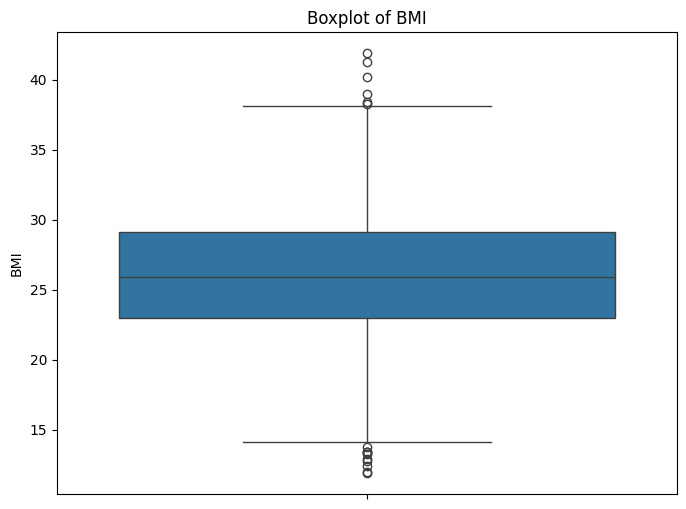

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BMI'])
plt.title('Boxplot of BMI')
plt.ylabel('BMI')
plt.show()

Dari gambar diatas, dapat disimnulkan bahwa:
1. Nilai distribusi BMI terfokus di sekitar nilai tengah, dengan median berada pada tingkat menengah, menunjukkan bahwa sebagian besar peserta berada dalam rentang indeks massa tubuh yang tergolong normal atau sedikit lebih tinggi.

2. Rentang interkuartil (IQR) memperlihatkan variasi yang cukup seimbang, yang berarti sebagian besar data BMI tidak terlalu menyimpang dari nilai pusat distribusi.

3. Ada outlier di bagian bawah distribusi, menandakan adanya individu dengan nilai BMI yang sangat rendah, yang mungkin mencerminkan masalah berat badan yang kurang.

4. Di sisi lain, terdapat juga outlier di bagian atas distribusi, menunjukkan bahwa ada individu dengan nilai BMI yang sangat tinggi, yang bisa menunjukkan kondisi obesitas pada sebagian kecil dari responden.

 Secara umum, distribusi BMI cukup konsisten dengan adanya sedikit nilai ekstrem di kedua ujungnya.

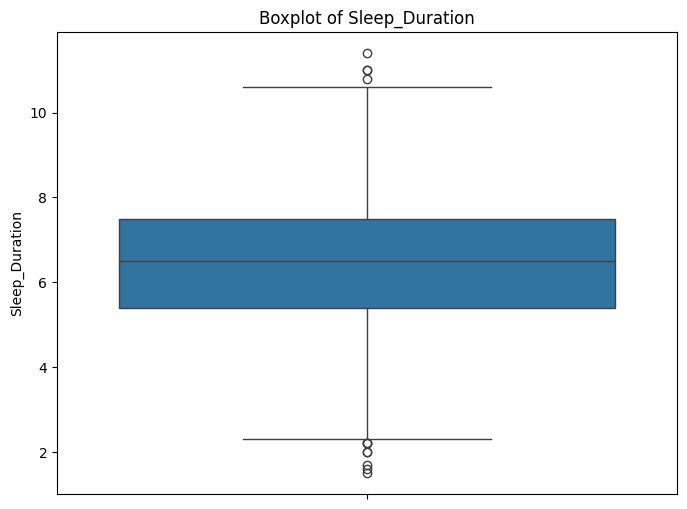

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Sleep_Duration'])
plt.title('Boxplot of Sleep_Duration')
plt.ylabel('Sleep_Duration')
plt.show()

Dari gambar diatas, dapat disimpulkan bahwa:

1. Distribusi nilai Sleep_Duration terfokus di sekitar nilai tengah, dengan median terletak di titik tengah, yang mengindikasikan bahwa kebanyakan partisipan memiliki durasi tidur yang cukup normal.

2. Rentang interkuartil (IQR) menunjukkan variasi yang terbilang sedang, yang berarti mayoritas data durasi tidur tidak menyebar jauh dari nilai tengah distribusi.

3. Terdapat outlier di bagian bawah distribusi, yang menunjukkan adanya individu dengan durasi tidur yang sangat pendek, mungkin mencerminkan gangguan dalam pola tidur atau kondisi kesehatan tertentu.

4. Ada juga outlier di bagian atas distribusi, yang menunjukkan ada individu dengan durasi tidur yang jauh lebih panjang dibandingkan dengan kebanyakan responden.

Secara keseluruhan, distribusi Sleep_Duration cukup stabil dengan sejumlah kecil nilai ekstrem di masing-masing sisi.

#**Eksplorasi Data (EDA)**

##**Comparison**

Aktivitas:
Membandingkan rata-rata usia (Age) pada setiap kategori obat (Medication).

Tujuan:
Mengidentifikasi perbedaan karakteristik usia pasien berdasarkan jenis Medication yang digunakan serta membandingkan kelompok usia antar kategori obat secara langsung.

Visualisasi:
Bar Chart (Grafik Batang).

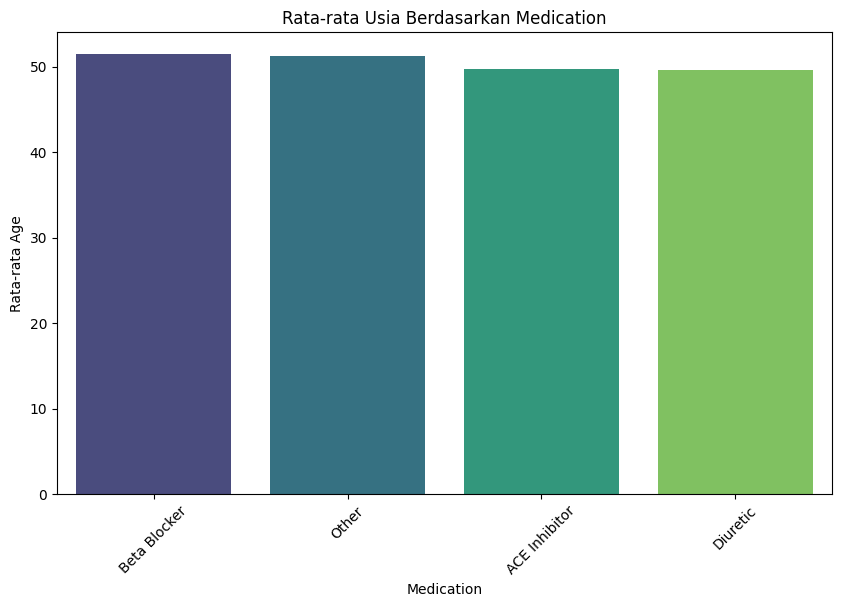

In [6]:
age_by_medication = df.groupby('Medication')['Age'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=age_by_medication.index, y=age_by_medication.values, hue=age_by_medication.index, palette='viridis')

plt.title('Rata-rata Usia Berdasarkan Medication')
plt.xlabel('Medication')
plt.ylabel('Rata-rata Age')
plt.xticks(rotation=45)
plt.show()

Dari diagram batang diatas, dapat disimpulkan bahwa:
1. Rata-rata usia pasien untuk masing-masing kategori Medication berada pada kisaran yang cukup dekat, yaitu di akhir 40-an hingga awal 50-an tahun, yang menunjukkan bahwa tipe-tipe obat tersebut tidak dikuasai oleh kelompok usia yang sangat bervariasi.

2. Kategori Medication seperti Beta Blocker dan Lainnya menunjukkan rata-rata usia yang sedikit lebih tinggi dibandingkan dengan kategori ACE Inhibitor dan Diuretic, yang menunjukkan bahwa obat-obat ini cenderung lebih banyak dipakai oleh pasien yang lebih senior.

3. Perbedaan rata-rata usia antar kategori Medication tampak tidak signifikan, sehingga usia tidak menjadi faktor utama dalam pemilihan jenis obat dalam dataset ini.

4. Pola ini menandakan bahwa berbagai jenis Medication digunakan oleh kelompok usia yang cukup serupa, sehingga kemungkinan faktor lain seperti kondisi kesehatan, tingkatan keparahan hipertensi, atau aspek gaya hidup lebih berpengaruh dalam pemilihan jenis obat dibandingkan hanya berdasarkan usia.

##**Composition**

Aktivitas:
Menganalisis komposisi penggunaan Medication berdasarkan proporsi jumlah pasien pada setiap kategori obat.

Tujuan:
Mengidentifikasi jenis Medication yang paling dominan digunakan.

Visualisasi:
Pie Chart (Diagram Lingkaran).

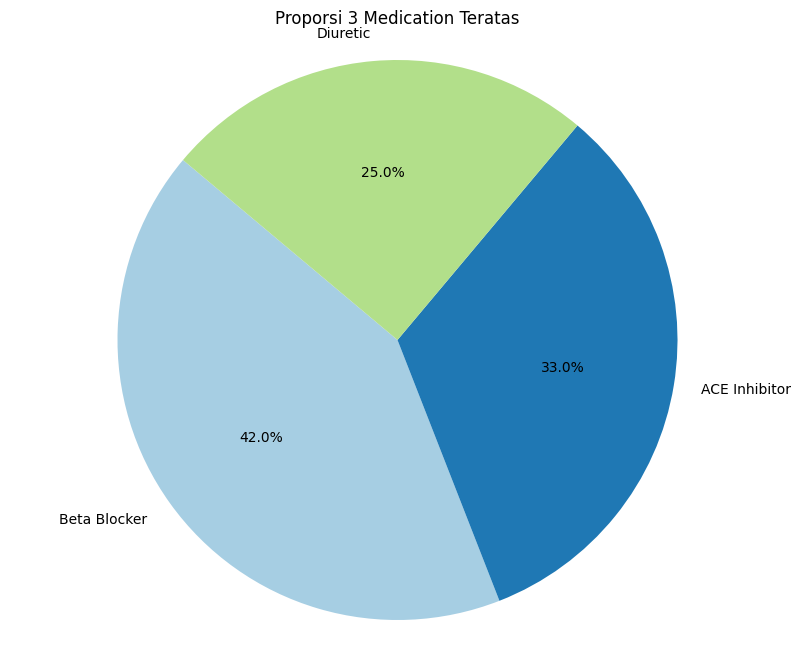

In [ ]:
medication_count = df.groupby('Medication').size().sort_values(ascending=False)
medication_top3 = medication_count.head(3)

plt.figure(figsize=(10, 8))
medication_top3.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title('Proporsi 3 Medication Teratas')
plt.ylabel('')
plt.axis('equal')
plt.show()

Dari diagram pie diatas, dapat disimpulkan bahwa:
1. Rincian penggunaan medication menunjukkan bahwa Beta Blocker adalah jenis obat yang paling menonjol dengan porsi kira-kira 42%, menjadikannya opsi yang paling sering dipilih dalam kumpulan data.

2. ACE Inhibitor berada di urutan kedua dengan porsi sekitar 33%, menunjukkan bahwa obat ini juga cukup luas digunakan namun masih di bawah Beta Blocker dalam hal tingkat penggunaan.

3. Diuretic memiliki porsi terendah di antara tiga jenis Medication teratas, yaitu sekitar 25%, sehingga relatif lebih sedikit digunakan dibandingkan dengan dua jenis obat lainnya.

4. Pola distribusi ini mengindikasikan bahwa pemakaian obat tidak seimbang, dengan lebih banyak pasien memilih Beta Blocker dan ACE Inhibitor daripada Diuretic.

5. Struktur komposisi tersebut menunjukkan bahwa pengobatan hipertensi dalam data lebih terfokus pada dua jenis obat utama, sementara Diuretic berfungsi sebagai opsi tambahan yang dipakai oleh sejumlah pasien.

##**Distribution**

Aktivitas:
Menganalisis penyebaran nilai Body Mass Index (BMI) pada data pasien.

Tujuan:
Melihat apakah mayoritas nilai BMI berada pada rentang rendah, sedang, atau tinggi serta mendeteksi adanya kecondongan distribusi (skewness) dalam data BMI.

Visualisasi:
Histogram.

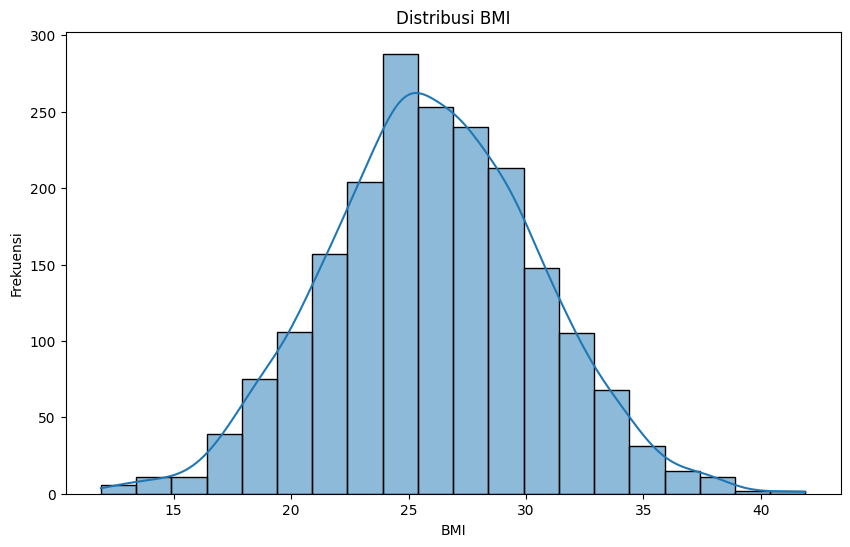

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=20, kde=True)

plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')

plt.show()

Dari Histogram diatas, dapat disimpulkan bahwa:
1. Pola distribusi nilai BMI menyerupai bentuk distribusi normal (seperti lonceng), dimana sebagian besar data terpusat di sekitar nilai rata-rata.

2. Titik tertinggi distribusi terletak pada rentang BMI sekitar pertengahan dua puluhan, yang mengindikasikan bahwa sebagian besar peserta berada dalam kategori berat badan normal hingga sedikit berlebihan.

3. Penyebaran data tampil relatif seimbang, walaupun ada ekor distribusi di kedua sisi yang menunjukkan terdapat individu dengan BMI rendah dan tinggi.

4. Frekuensi data berkurang secara bertahap seiring dengan nilai BMI yang semakin rendah atau tinggi, menandakan bahwa jumlah kasus dengan BMI ekstrem cukup sedikit jika dibandingkan dengan kelompok mayoritas.

Secara keseluruhan, distribusi BMI menunjukkan variasi yang cukup sederhana dalam populasi, dengan konsentrasi paling besar pada rentang BMI yang sedang.

##**Relationship**

Aktivitas:
Menganalisis hubungan (korelasi) antara variabel numerik, yaitu Age, BMI, Stress_Score, dan Sleep_Duration.

Tujuan:
Mengetahui apakah terdapat hubungan yang signifikan antara faktor usia, indeks massa tubuh, tingkat stres, dan durasi tidur, serta mengidentifikasi variabel mana yang memiliki keterkaitan paling kuat dalam konteks kondisi kesehatan pasien.

Visualisasi:
Heatmap

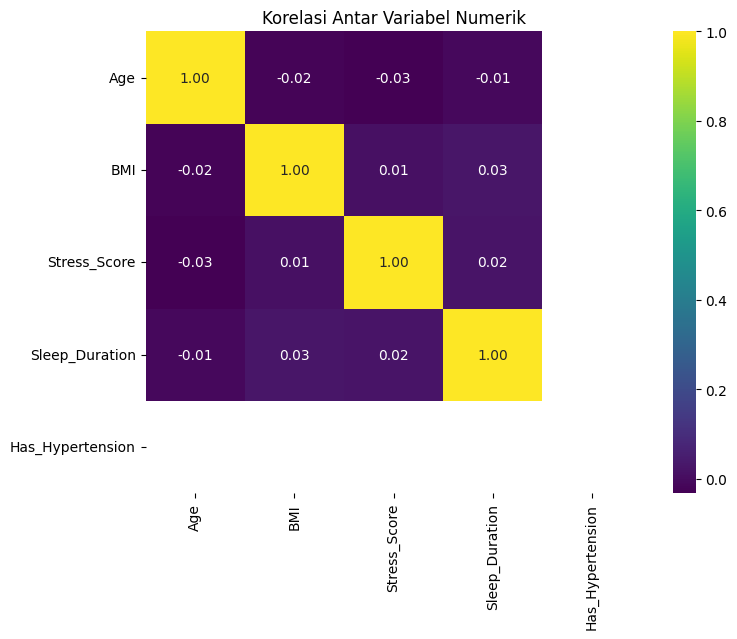

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=df[['Age', 'BMI', 'Stress_Score', 'Sleep_Duration', 'Has_Hypertension']].corr(),
    annot=True,
    cmap='viridis',
    fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

Dari heatmap diatas, dapat disimpulkan bahwa:
1. Hubungan antara variabel numerik seperti (Age, BMI, Stress_Score, dan Sleep_Duration) menunjukkan nilai yang sangat kecil dan mendekati nol, yang menunjukkan bahwa adanya hubungan linear di antara variabel-variabel tersebut sangat lemah.

2. Age memiliki hubungan negatif yang sangat rendah terhadap BMI, Stress_Score, dan Sleep_Duration, sehingga perubahan usia tidak memiliki dampak yang signifikan terhadap ketiga variabel ini dalam data yang ada.

3. BMI memperlihatkan keterkaitan positif yang sangat kecil dengan Stress_Score dan Sleep_Duration, yang menunjukkan bahwa peningkatan BMI hanya memiliki hubungan yang sangat minim terhadap tingkat stres dan waktu tidur.

4. Stress_Score dan Sleep_Duration juga menunjukkan hubungan positif yang sangat lemah, yang menunjukkan bahwa tingkat stres dan waktu tidur hampir tidak memiliki hubungan linear yang signifikan.

Secara keseluruhan, hasil analisis korelasi ini menunjukkan bahwa variabel-variabel numerik dalam dataset cenderung berdiri sendiri dan tidak saling berpengaruh dengan kuat, sehingga hubungan antara variabel kemungkinan bersifat kompleks atau dipengaruhi oleh faktor lain yang tidak dianalisis.